In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [8]:
models_name = [
    "basic-mini",
    "basic-base",
    "basic-large",
    "february_finetuned",
    "march_finetuned",
    "art-mini",
    "art-base",
    "art-large",
]
data = {}
for model_name in models_name:
    data[model_name] = {}
    data[model_name]["naive"] = pd.read_csv(f"../../benchmarks/Iconclass/res_{model_name}.csv")
    data[model_name]["exploded"] = pd.read_csv(f"../../benchmarks/Iconclass/exploded_{model_name}.csv")
    data[model_name]["exploded_mean"] = data[model_name]["exploded"].groupby("lang").mean().reset_index()

In [5]:
data["basic-mini"]["naive"]

,lang,loss,average_position,mrr,recall@1,recall@5,recall@10,nDCG@1,nDCG@5,nDCG@10
0,en,4.963520,312.297152,0.069684,0.032241,0.093498,0.137023,0.032241,0.062380,0.076302
1,fr,5.468622,394.590543,0.045482,0.015046,0.060183,0.099409,0.015046,0.037838,0.050102
2,nl,5.898305,470.023106,0.030777,0.008598,0.035465,0.064481,0.008598,0.022879,0.032130


In [11]:
data["basic-mini"]["exploded_mean"]

,lang,fold#,loss,average_position,mrr,recall@1,recall@5,recall@10,nDCG@1,nDCG@5,nDCG@10
0,en,1.0,4.926602,179.991903,0.086276,0.044534,0.110211,0.157445,0.044534,0.078293,0.093243
1,fr,1.0,5.133674,210.721547,0.053587,0.019793,0.067476,0.112011,0.019793,0.043978,0.058328
2,nl,1.0,5.651400,261.119208,0.034946,0.010796,0.044085,0.064777,0.010796,0.028183,0.034799


In [16]:
def plot_metric_bar(dfname, metric, ymin=None, ymax=None):
    langs = ["fr", "en", "nl"]
    color=["#40739e", "#40739e", "#40739e", "#192a56", "#192a56", "#206915", "#8c6d15", "#8c2912"]
    color_per_model = {
        "basic-mini": color[0],
        "basic-base": color[1],
        "basic-large": color[2],
        "february_finetuned": color[3],
        "march_finetuned": color[4],
        "art-mini": color[5],
        "art-base": color[6],
        "art-large": color[7],
    }

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for i, lang in enumerate(langs):

        bars_x = []
        bars_y = []
        bars_labels = []
        bars_colors = []

        ax = axs[i]

        for j, model_name in enumerate(models_name):
            lang_df = data[model_name][dfname].loc[data[model_name][dfname]["lang"] == lang]
            bars_x.append(j)
            bars_y.append(lang_df[metric].values[0])
            bars_labels.append(model_name)
            bars_colors.append(color_per_model[model_name])

        bars = ax.bar(bars_x, bars_y, color=bars_colors, tick_label=bars_labels)
        ax.set_xlabel("Models")
        ax.set_ylabel(metric)
        ax.set_title(f"{lang.upper()} - {metric.upper()}")
        ax.set_xticks(bars_x)
        ax.set_xticklabels(bars_labels, rotation=45, ha="right")
        ax.set_ylim(ymin, ymax)

    # Create the bar plot
    plt.tight_layout()
    plt.show()

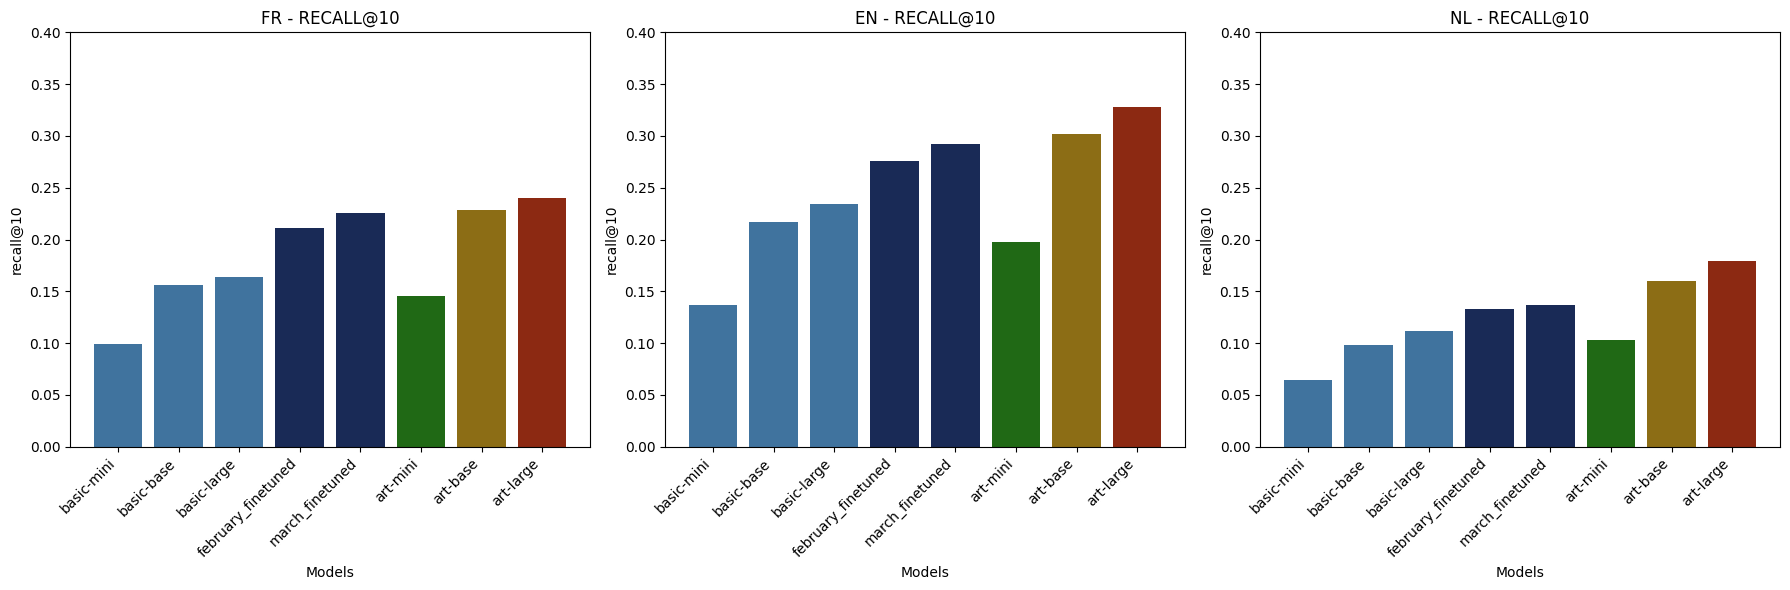

In [23]:
plot_metric_bar("naive", "recall@10", 0.0, 0.4)

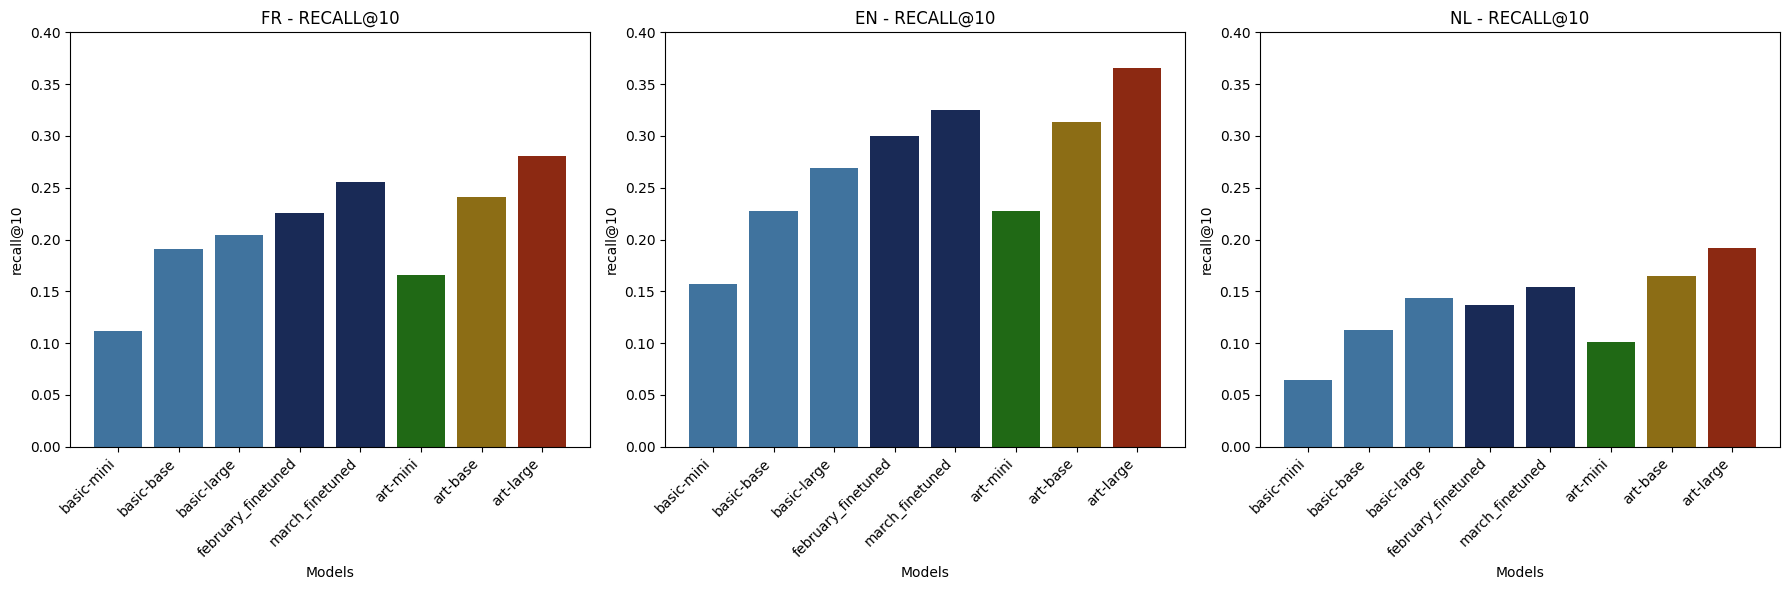

In [24]:
plot_metric_bar("exploded_mean", "recall@10", 0.0, 0.4)